In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


customers_df = pd.read_csv("https://raw.githubusercontent.com/ilhamarifinsamsul/final-project-analisis-data/refs/heads/main/data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [2]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/ilhamarifinsamsul/final-project-analisis-data/refs/heads/main/data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Assessing Data

Menilai tabel customer_df

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Menilai tabel orders_df

In [7]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [8]:
orders_df.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [9]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Cleaning Data

Membersihkan tabel customers_df

In [11]:
customers_df.duplicated().sum()

np.int64(0)

In [12]:
customers_df.drop_duplicates(inplace=True)

In [13]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Membersihkan tabel orders_df

In [15]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
orders_df.duplicated().sum()

np.int64(0)

In [18]:
orders_df.drop_duplicates(inplace=True)

In [19]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [20]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [22]:
datetime_columns = ["order_purchase_timestamp", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [23]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
84821,1a34a593e6d30a998c2c7307606ca9dc,a82c903422dab535f281aa773b033a46,39735,divinolandia de minas,MG
43670,eee794050554ac160892daad8d727ec8,bf2646231223621318c2490e0185cd43,36260,alto rio doce,MG
69308,369eb3d661e1d58298d904d8c3be17dc,2a21b7a2dc690c223407ba844254c780,2675,sao paulo,SP
46951,91b11e2acc1422c03b7aa04534c3bb47,19267b331b891f226fb947a97c98575b,26083,nova iguacu,RJ
43883,e1ec5ddd749cd760a0c408a40ae5a4a3,3b253518af1e74199da663e4e5be0ba8,57017,maceio,AL


In [24]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [25]:
customers_df.customer_id.is_unique

True

In [26]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [29]:
customers_df.groupby(by="customer_city").agg({
    "customer_id": "nunique",
})

,customer_id
customer_city,
abadia dos dourados,3
abadiania,1
abaete,12
abaetetuba,11
abaiara,2
...,...
xinguara,9
xique-xique,3
zacarias,2


In [30]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [31]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

Explore orders_df

In [32]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3208,78d7bf360bb60d0dd4bd37663c126524,bbfd6562ad0326487d9e5c8e6433fc8d,delivered,2018-08-26 13:23:23,2018-08-26 13:35:09,2018-08-27 15:12:00,2018-08-30 23:40:54,2018-09-10
25020,556d7ec009cdd5ae19dad069c808ad9c,d240701e28474e8e538c7665b899f3c0,delivered,2017-08-21 13:47:44,2017-08-24 18:46:35,2017-08-28 12:05:28,2017-08-30 17:05:59,2017-09-11
82310,cbb7694680a105281d391bf7002c0477,9cfee1a78f5e0820ca53ea2eb4180794,delivered,2018-05-03 00:03:53,2018-05-04 03:35:22,2018-05-04 13:56:00,2018-05-09 23:54:41,2018-05-24
30316,4103cb8c02ddae6eff9f233ba22ae0ad,ddcb9a6c17c703895e618d0387f36f96,delivered,2018-02-10 18:53:24,2018-02-10 19:05:29,2018-02-14 18:18:57,2018-02-26 22:12:43,2018-03-08
19594,9eec24a1fa2828ef3fdac074f2928f93,a93fa626931eafc7562939f23e3fe926,delivered,2018-02-11 17:53:57,2018-02-11 18:47:50,2018-02-16 13:35:28,2018-02-24 13:11:51,2018-03-09


In [43]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,90733,81018,95664,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,NaN
freq,1,1,96478,NaN,9,47,3,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,NaN,NaN,NaN,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,NaN,NaN,NaN,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,NaN,NaN,NaN,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,NaN,NaN,NaN,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,NaN,NaN,NaN,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,NaN,NaN,NaN,2018-11-12 00:00:00


In [44]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [45]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [46]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: order_id, dtype: int64

Explore all data

Menghubungkan semua data

In [48]:
all_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="order_id",
    right_on="customer_id"
)
all_df.head()

,order_id,customer_id_x,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_id_y,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,NaN,NaN,NaN,NaN,NaN
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,NaN,NaN,NaN,NaN,NaN
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,NaN,NaN,NaN,NaN,NaN
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,NaN,NaN,NaN,NaN,NaN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,NaN,NaN,NaN,NaN,NaN


In [66]:
all_df.to_csv("all_data.csv", index=False)

In [67]:
all_df.sample(5)

,order_id,customer_id_x,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_id_y,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
16702,3143dab57ae1317b6911e1330ebd4dac,3b163becc751c8b1988feab2f1a9c992,delivered,2018-07-13 13:03:16,2018-07-14 13:04:03,2018-07-17 15:26:00,2018-07-23 16:38:56,2018-08-22,NaN,NaN,NaN,NaN,NaN
99219,7818864c8604b6c6114235d245908ad6,67cacf586b432939b6ae2465b2aecf44,delivered,2018-03-03 08:45:50,2018-03-03 09:08:35,2018-03-05 19:19:50,2018-03-18 15:55:22,2018-04-03,NaN,NaN,NaN,NaN,NaN
64958,05d579e3abe4a2d25c8feca9f7a685d8,59fd56a451437919bf2ea954a6baca5c,delivered,2018-02-08 23:50:57,2018-02-09 00:48:17,2018-02-17 03:12:47,2018-02-17 10:28:36,2018-03-05,NaN,NaN,NaN,NaN,NaN
87020,0e5c7d003ff6919e7633939b2cb151fd,ff869205a42a4de9aa4a4bc357c62507,delivered,2018-02-07 19:01:39,2018-02-07 19:10:35,2018-02-08 17:18:59,2018-02-22 18:12:19,2018-03-09,NaN,NaN,NaN,NaN,NaN
75454,715df31025aff2a2dd08b0d8c92ee63b,2b734aca7ae6ebd9138a4d1879b0d20c,delivered,2018-05-17 10:57:12,2018-05-18 04:36:04,2018-05-23 14:10:00,2018-06-07 16:46:32,2018-06-12,NaN,NaN,NaN,NaN,NaN


In [68]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [72]:
monthly_orders_df = all_df.resample(rule='M', on='order_estimated_delivery_date').agg({
    "order_id": "nunique",
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
}, inplace=True)
monthly_orders_df.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15672\2294048340.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_orders_df = all_df.resample(rule='M', on='order_estimated_delivery_date').agg({


,order_estimated_delivery_date,order_count
0,September,1
1,October,6
2,November,171
3,December,148
4,January,3


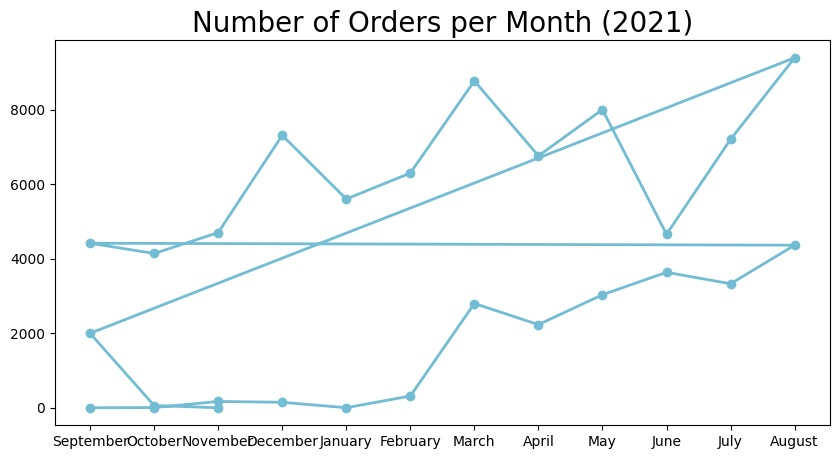

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_estimated_delivery_date"],
    monthly_orders_df["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Orderan yang sudah terdelivery?

In [78]:
sum_order_items_df = all_df.groupby("order_status").order_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,order_status,order_id
0,shipped,ee64d42b8cf066f35eac1cf57de1aa856942b8da583c2f...
1,delivered,e481f51cbdc54678b7cc49136f2d6af753cdb2fc8bc7dc...
2,created,b5359909123fa03c50bdb0cfed07f098dba5062fbda3af...
3,approved,a2e4c44360b4a57bdff22f3a4630c173132f1e724165a0...
4,unavailable,8e24261a7e58791d10cb1bf9da94df5cc272bcd21c2874...
5,canceled,1b9ecfe83cdc259250e1a8aca174f0ad714fb133a6730a...
6,processing,15bed8e2fec7fdbadb186b57c46c92f2d3c8851a6651ee...
7,invoiced,136cce7faa42fdb2cefd53fdc79a60980760a852e4e9d8...


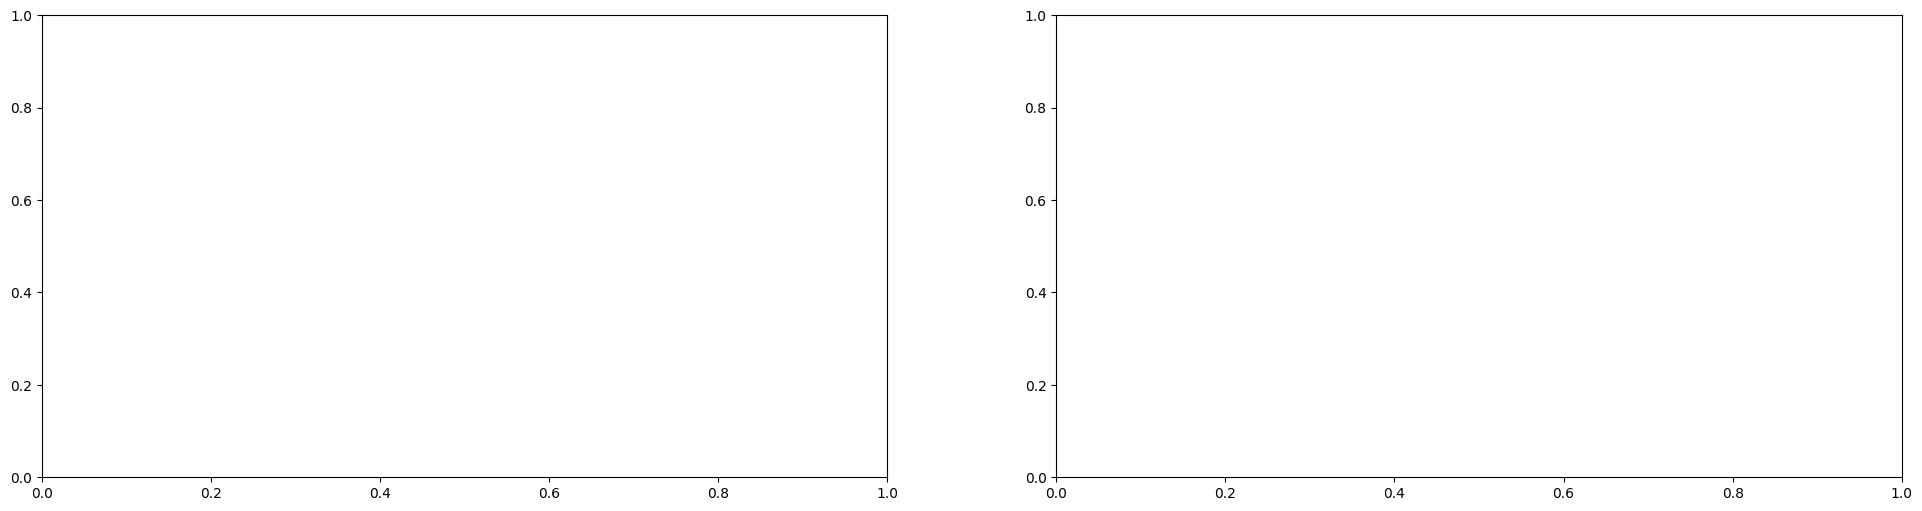

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

Berdasarkan kelompok state